# AV Scheduling for household

### Initialize
* Inital functions and package
* Read input

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import networkx as nx
%matplotlib inline
from DYNASMART_Process import *
import DYNASMART_Process as dy
import AV_functions as av

In [2]:
#Read in the basic traveler and trips informationa and joint the houshold id
# traveler_info=pd.read_csv('input/traveler.csv')
# personData=pd.read_csv('input/personData_1.csv')
# hh_temp=personData[['person_id','hh_id']]
# traveler_trips=pd.merge(traveler_info,hh_temp,how='left',on=['person_id'])
traveler_trips=pd.read_csv('input/traveler_trip_info.csv')
num_zones,num_nodes,num_links,node_detail,node_id,link_detail,link_id=dy.read_network('input/network.dat')
nodexy=dy.read_xy('input/xy.dat')
#origins,destinations=dy.read_origin_destion('input/origin.dat','input/destination.dat')

### Draw the sub-area network

C:\Users\Alex\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Alex\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Alex\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Alex\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0

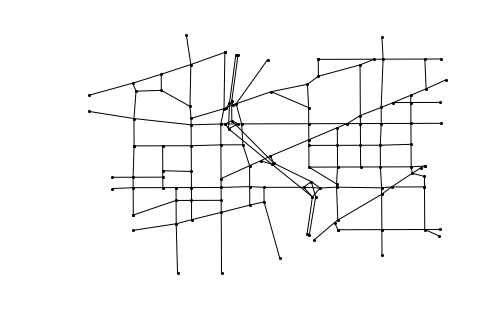

In [3]:
cluster_highlight([])

### Sample Household
Select household 2105189 for intial analysis

In [6]:
traveler_trips.head()

,person_id,num_trips,value_of_time,trip_counter,ActivityTime,tripmode,orig_purpose,dest_purpose,orig_maz,orig_taz,dest_maz,dest_taz,starttimeinterval,starttime,hh_id,origin_node,destination_node
0,8600957,11,0.1164,1,24,1,Home,Shop,1,1,62,16,1,1,2744264,9738,10592
1,8600957,11,0.1164,2,32,3,Shop,eatingout,62,16,20,5,1,31,2744264,10710,9863
2,8600957,11,0.1164,3,39,1,eatingout,Maintenance,20,5,3,1,1,68,2744264,10056,9738
3,8600957,11,0.1164,4,198,3,Maintenance,Home,3,1,1,1,1,109,2744264,9674,9737
4,8600957,11,0.1164,5,191,1,Home,work,1,1,14,4,8,308,2744264,9865,9505


In [37]:
target_hh=2105189
people_in_hh=traveler_trips[traveler_trips['hh_id']==2105189]['person_id'].unique()
for person in people_in_hh:
    #creat trip-chain-origin-destination-list
    num_trips=traveler_trips[traveler_trips['person_id']==person]['num_trips'].iloc[0]
    print(num_trips)
    trip_chain_or=traveler_trips[traveler_trips['person_id']==person][['origin_node','destination_node']]
    trip_chain_or['origin_node'].iloc[1:num_trips-1]=trip_chain_or['destination_node'].iloc[0:num_trips-2].tolist()
    trip_chain_or['origin_node'].iloc[num_trips-1]=trip_chain_or['destination_node'].iloc[num_trips-2]
    #draw the graph
    
#traveler_trips[traveler_trips['hh_id']==2105189]

10
9
4
7


In [60]:
def trip_chain_highlight(trip_chain_or):
    '''
        input trip_chain_or: a dataframe contains the origin and destination nodes of all the trips in one trip chain
    '''
    Gnormal=nx.Graph()
    Gred=nx.Graph()
    for nodeinf in node_detail:
        node=nodeinf[0,0]
        Gnormal.add_node(node,pos=(nodexy[node][0],nodexy[node][1]))
        Gred.add_node(node,pos=(nodexy[node][0],nodexy[node][1]))
    for linkinf in link_detail: 
        Gnormal.add_edge(linkinf[0,0],linkinf[0,1])
    for index,row in trip_chain_or.iterrows():
        Gred.add_edge(row['origin_node'],row['destination_node'])
    pos=nx.get_node_attributes(Gnormal,'pos')
    nx.draw(Gnormal,pos,node_size=1,node_color='black')
    nx.draw(Gred,pos,edge_color='r',node_color='black',node_size=4,arrows=True,style='dotted')
    return    

C:\Users\Alex\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Alex\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Alex\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Alex\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0

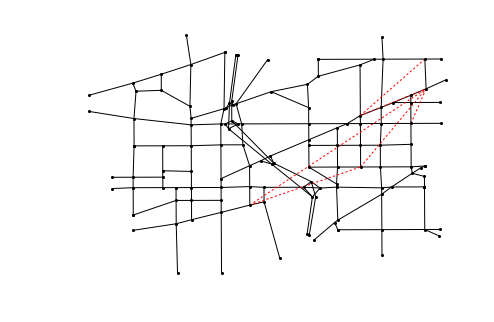

In [61]:
trip_chain_highlight(trip_chain_or)

In [38]:
trip_chain_or

,origin_node,destination_node
138479,10762,10540
138480,10540,10772
138481,10772,10709
138482,10709,10772
138483,10772,10543
138484,10543,10058
138485,10058,10772


In [30]:
trip_chain_or

,origin_node,destination_node
138479,10762.0,10540
138480,10540.0,10772
138481,10772.0,10709
138482,10709.0,10772
138483,10772.0,10543
138484,10543.0,10058
138485,9866.0,10772


In [8]:
num_person

array([7078533, 7078534, 7078535, 7078536], dtype=int64)

Visulization the sample household activity chains